In [1]:
# Initial imports
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
#from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Read each file as data frames.
combined_df = pd.read_csv("../Cleaning_PseudoCode/Resources/Combined_Sentiments.csv")

In [3]:
combined_df.head()

,tweet,score
0,"['tim', 'tebow', 'may', 'avail', 'wow', 'jerri...",1.0
1,"['aga', 'tayo', 'tomorrow', 'ah', ':)', 'good'...",1.0
2,"['lunch', 'new', 'lil', 'spot', '...', 'cotton...",1.0
3,"['snc', 'halloween', 'pr', 'pump', 'let', 'us'...",1.0
4,"['loui', 'inspir', 'outfit', 'monday', 'zayn',...",1.0


In [4]:
#Dropping neutral tweets from dataframe 
combined_df = combined_df[combined_df.score != 0.0]

In [5]:
combined_df['score'].replace({-1.0: 0}, inplace = True)

In [6]:
#Seperating features and labels 
X = combined_df['tweet']
y = combined_df['score']

In [7]:
y.unique()

array([1., 0.])

In [8]:
# Separating the 85% data for training data and 15% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15, random_state = 1000)

In [9]:
#Choose a method for vectorizing TF-IDF vectorizer OR Bag of Words OR Ngrams 

#Fit the TF-IDF Vectorizer 
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  149435


In [10]:
#TF-IDF Vectorizer 
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [11]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

         0.0       0.97      0.05      0.10      1090
         1.0       0.72      1.00      0.84      2653

    accuracy                           0.72      3743
   macro avg       0.84      0.53      0.47      3743
weighted avg       0.79      0.72      0.62      3743



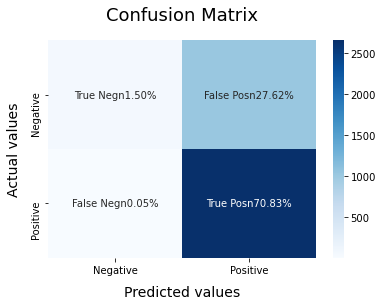

In [12]:
#Bernoulli Naive Bayes 
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred = BNBmodel.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.79      0.60      0.68      1090
         1.0       0.85      0.93      0.89      2653

    accuracy                           0.84      3743
   macro avg       0.82      0.77      0.79      3743
weighted avg       0.83      0.84      0.83      3743



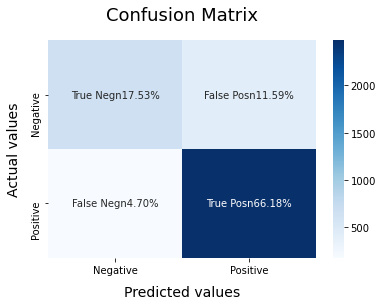

In [13]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.82      0.51      0.63      1090
         1.0       0.82      0.95      0.88      2653

    accuracy                           0.82      3743
   macro avg       0.82      0.73      0.76      3743
weighted avg       0.82      0.82      0.81      3743



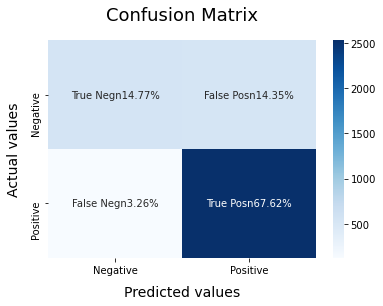

In [14]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)